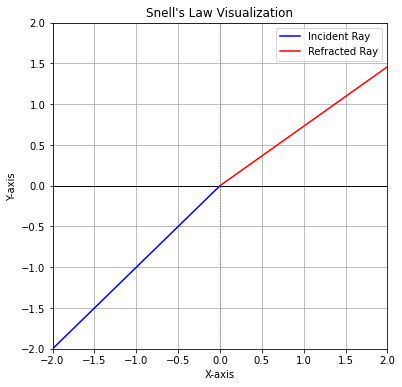

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def snell_law(n1, n2, theta1):
    """Calculate the refraction angle using Snell's Law."""
    theta1_rad = np.radians(theta1)
    sin_theta2 = (n1 / n2) * np.sin(theta1_rad)
    if abs(sin_theta2) > 1:
        return None  # Total internal reflection
    theta2_rad = np.arcsin(sin_theta2)
    return np.degrees(theta2_rad)

def plot_refraction(n1, n2, theta1):
    """Plot the incident and refracted rays based on Snell's Law."""
    theta2 = snell_law(n1, n2, theta1)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.axhline(0, color='k', linewidth=1)  # Interface line
    
    # Incident ray
    x_incident = np.array([-2, 0])
    y_incident = np.tan(np.radians(theta1)) * x_incident
    ax.plot(x_incident, y_incident, 'b', label='Incident Ray')
    
    if theta2 is not None:
        # Refracted ray
        x_refracted = np.array([0, 2])
        y_refracted = np.tan(np.radians(theta2)) * x_refracted
        ax.plot(x_refracted, y_refracted, 'r', label='Refracted Ray')
    else:
        # Total internal reflection
        x_reflected = np.array([0, -2])
        y_reflected = np.tan(np.radians(theta1)) * x_reflected
        ax.plot(x_reflected, y_reflected, 'g', linestyle='dashed', label='Reflected Ray')
    
    # Normal line
    ax.axvline(0, color='gray', linestyle='dotted', linewidth=1)
    
    # Labels and formatting
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    ax.set_title("Snell's Law Visualization")
    plt.grid()
    plt.show()

# Example usage
n1, n2 = 1.0, 1.2  # Refractive indices
theta1 = 45  # Incident angle in degrees
plot_refraction(n1, n2, theta1)


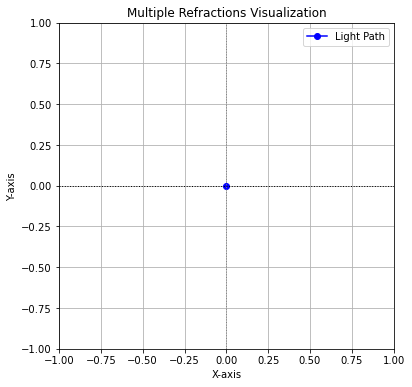

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def snell_law(n1, n2, theta1):
    """Calculate the refraction angle using Snell's Law."""
    theta1_rad = np.radians(theta1)
    sin_theta2 = (n1 / n2) * np.sin(theta1_rad)
    if abs(sin_theta2) > 1:
        return None  # Total internal reflection
    theta2_rad = np.arcsin(sin_theta2)
    return np.degrees(theta2_rad)

def plot_multiple_refractions(relative_ri_string, initial_theta):
    """Plot multiple refractions based on a string of relative refractive indices."""
    x, y = [0], [0]  # Starting point of the ray
    current_theta = initial_theta
    x_step = 2  # Horizontal step per refraction
    y_offset = -1  # Vertical offset per refraction layer
    
    for i, digit in enumerate(relative_ri_string):
        n_rel = int(digit) * 0.1  # Convert digit to relative RI
        
        if i == 0:
            n1, n2 = 1, n_rel  # First transition from air
        else:
            n1, n2 = n2, n_rel  # Transition between layers
        
        theta2 = snell_law(n1, n2, current_theta)
        if theta2 is None:
            break  # Total internal reflection, stop refractions
        
        # Compute next segment
        x_new = x[-1] + x_step
        y_new = y[-1] + np.tan(np.radians(current_theta)) * x_step
        x.append(x_new)
        y.append(y_new)
        
        # Move to next interface
        x.append(x_new)
        y.append(y_offset * (i + 1))
        current_theta = theta2
    
    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(x, y, 'b', marker='o', label='Light Path')
    
    # Draw horizontal surfaces
    for i in range(len(relative_ri_string)):
        ax.axhline(y_offset * i, color='k', linestyle='dotted', linewidth=1)
    
    ax.axvline(0, color='gray', linestyle='dotted', linewidth=1)  # Initial normal
    ax.set_xlim(-1, max(x) + 1)
    ax.set_ylim(min(y) - 1, 1)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    ax.set_title("Multiple Refractions Visualization")
    plt.grid()
    plt.show()

# Example usage
relative_ri_string = "1"
initial_theta = 30  # Initial incident angle in degrees
plot_multiple_refractions(relative_ri_string, initial_theta)


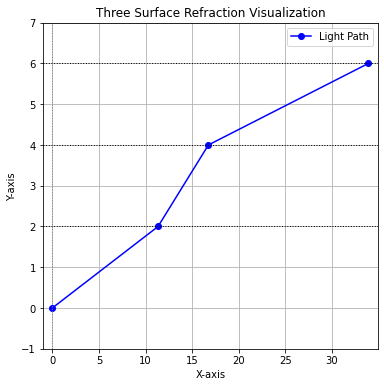

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def snell_law(n1, n2, theta1):
    """Calculate the refraction angle using Snell's Law."""
    theta1_rad = np.radians(theta1)
    sin_theta2 = (n1 / n2) * np.sin(theta1_rad)
    if abs(sin_theta2) > 1:
        return None  # Total internal reflection
    theta2_rad = np.arcsin(sin_theta2)
    return np.degrees(theta2_rad)

def plot_three_refractions(n_values, initial_theta):
    """Plot refractions at three interfaces with given refractive indices."""
    x, y = [0], [0]  # Starting point of the ray
    current_theta = initial_theta
    x_step = 3  # Horizontal step per refraction
    y_offset = 2  # Vertical position of each interface
    
    for i in range(3):
        n1, n2 = n_values[i], n_values[i+1]
        theta2 = snell_law(n1, n2, current_theta)
        if theta2 is None:
            # Total internal reflection: Reflect the ray back
            current_theta = -current_theta
            theta2 = current_theta
        
        # Compute next segment up to the interface
        y_interface = y_offset * (i + 1)
        x_new = x[-1] + (y_interface - y[-1]) / np.tan(np.radians(current_theta))
        y_new = y_interface
        x.append(x_new)
        y.append(y_new)
        
        # Update angle for next refraction
        current_theta = theta2
    
    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(x, y, 'b', marker='o', label='Light Path')
    
    # Draw horizontal surfaces
    for i in range(3):
        ax.axhline(y_offset * (i + 1), color='k', linestyle='dotted', linewidth=1)
    
    ax.axvline(0, color='gray', linestyle='dotted', linewidth=1)  # Initial normal
    ax.set_xlim(min(x) - 1, max(x) + 1)
    ax.set_ylim(-1, max(y) + 1)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    ax.set_title("Three Surface Refraction Visualization")
    plt.grid()
    plt.show()

# Example usage
n_values = [0.2, 0.1, 0.3,0.8]  # Sensible refractive indices (Air, Glass, Water, Air)
initial_theta = 10  # Initial incident angle in degrees
plot_three_refractions(n_values, initial_theta)
